#This is my notebook for my Capston Project 

In [4]:
import numpy as np
import pandas as pd

In [5]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


__Background__: Accident prediction is an important applcation of ML. Thousands of American's are impacted directly or indirectly by accidents daily. The potential to predict the risk of an accident based on features like the weather can be a game changer for emergency response teams and road users.

The objective of this project is to predict the severity of an accident based on certain data (attributes). These attributes include (but are not limited to): 
- Collision Count
- Vehicle Count 
- Person Count 
- Injuries
- Fatalities
- Junction Type
- Weather

These predictors will be used to determine the target (severity of an accident) using supervised ML techniques. 






__Methodology__:
We partitioned the dates results into the seasons (Summer, Winter, Fall, Spring), time of day (Early morning, Early enevening etc) and used one hot encoding to preprocess our data set. We split our data into training (70%) and testing data (30%). We then used support vector machines as our classifier algorithm and compared four kernels (linear, rbf, sigmoid) we selected the kernel that gave us the most accurate reuslts and used that to glean from our data.  

__Results__: 
From our prediction, we gleaned the following:
- The weather: 

In [6]:
path = '~/Downloads/Data-Collisions.csv'
all_data = pd.read_csv(path)#, columns = )
all_data.dropna(axis = 1, thresh = int(len(all_data)*0.9), inplace = True)
all_data.dropna(axis = 0, inplace = True)## dropping all_columns with na values
#len(all_data['INCDTTM'])

C:\Users\Seun Romiluyi\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


180067

In [7]:
columns_to_drop = ['OBJECTID', 
'INCKEY','COLDETKEY', 'INTKEY', 
'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INCDATE', 'INCDTTM', 'X',  'Y', 'STATUS', 
                   'REPORTNO', 'SEVERITYCODE.1', 'LOCATION', 'ST_COLCODE', 'ST_COLDESC', 
                   'SEGLANEKEY', 'CROSSWALKKEY', 'SDOT_COLDESC', 'SDOT_COLCODE']
month, day, year, time_of_day = [], [], [], []



for i in all_data.columns:
    if len(pd.unique(all_data[i])) > 1:
       # print(i)
    if i == 'INCDTTM':
        for j in all_data[i]:
            #print(j)
            split1 = j.split('/')
            split2 = (j.split('/')[2]).split()
            month.append(int(split1[0]))
            day.append(int(split1[1]))
            year.append(int(split2[0]))            
            if len(split2) > 1:
                split3 = (j.split('/')[2]).split()[1]
                hour_hol = int(((split3).split(':')[0]))
                am_pm_holder = split2[-1]
                #print(type(am_pm_holder), hour_hol, type(hour_hol))
                if hour_hol >= 6 and hour_hol < 12  and am_pm_holder == 'AM':
                            time_of_day.append('Late Morning')
                elif (hour_hol < 6 or hour_hol == 12) and am_pm_holder == 'AM':
                            time_of_day.append('Early Morning')
                elif hour_hol >= 8 and hour_hol < 12  and am_pm_holder == 'PM':
                            time_of_day.append('Late Evening')
                elif (hour_hol < 5 or hour_hol == 12)  and am_pm_holder == 'PM':
                            time_of_day.append('Afternoon')                        
                elif hour_hol >= 5 and hour_hol < 8 and am_pm_holder == 'PM':
                            time_of_day.append('Early Evening (Rush Hour)')
            
            else:
                time_of_day.append('No time reported')
for col in columns_to_drop:
    if col in all_data.columns:
        all_data.drop(columns = col, inplace = True)        
#all_data.drop(columns = columns_to_drop)
all_data['MONTH'] = month
#all_data['DAY'] = day
all_data['YEAR'] = year
all_data['TIMEOFDAY'] = time_of_day
all_data['SEVERITYCODE'] = all_data['SEVERITYCODE']-1 ## Make prediction binary  0 for 1, 1 for 2


SEVERITYCODE
X
Y
OBJECTID
INCKEY
COLDETKEY
REPORTNO
STATUS
ADDRTYPE
LOCATION
SEVERITYCODE.1
SEVERITYDESC
COLLISIONTYPE
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
INCDATE
INCDTTM
JUNCTIONTYPE
SDOT_COLCODE
SDOT_COLDESC
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR


In [8]:
print(len(time_of_day), len(all_data))
number_of_1 = len((all_data[all_data['SEVERITYCODE'] == 0])) 
number_of_2 = len((all_data[all_data['SEVERITYCODE'] == 1]))
#print(number_of_1, number_of_2)
if number_of_1 > number_of_2:
    number1_data = all_data[all_data['SEVERITYCODE'] == 0]
    number2_data = all_data[all_data['SEVERITYCODE'] == 1]
    sample = number1_data.sample(n = number_of_2)
    new_all_data = pd.concat([sample, number2_data])#+number2_data)
    #print(pd.DataFrame(number1_data))
new_all_data


180067 180067
124258 55809


,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,MONTH,YEAR,TIMEOFDAY
113825,0,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,Mid-Block (but intersection related),N,Overcast,Wet,Daylight,N,6,2012,Afternoon
65066,0,Block,Property Damage Only Collision,Parked Car,2,0,0,2,Mid-Block (but intersection related),0,Overcast,Dry,Daylight,N,6,2008,Late Morning
112600,0,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,Mid-Block (not related to intersection),N,Raining,Wet,Dawn,N,11,2012,Late Morning
42048,0,Intersection,Property Damage Only Collision,Angles,2,0,0,2,At Intersection (intersection related),0,Clear,Dry,Daylight,N,5,2006,Late Morning
102407,0,Intersection,Property Damage Only Collision,Left Turn,2,0,0,2,At Intersection (intersection related),N,Raining,Wet,Dark - Street Lights On,N,12,2011,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,1,Block,Injury Collision,Angles,3,0,0,2,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,N,1,2019,Afternoon
194666,1,Block,Injury Collision,Angles,2,0,0,2,Mid-Block (not related to intersection),N,Clear,Wet,Daylight,N,1,2019,Afternoon
194668,1,Block,Injury Collision,Head On,3,0,0,2,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N,11,2018,Late Morning
194670,1,Intersection,Injury Collision,Left Turn,3,0,0,2,At Intersection (intersection related),N,Clear,Dry,Daylight,N,1,2019,Late Morning


In [9]:
#['STATUS', 'REPORTNO', 'SEVERITYCODE.1', 'LOCATION', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY']
#new_all_data.drop('STATUS', axis = 1, inplace = True)
#new_all_data.drop('REPORTNO', axis = 1, inplace = True)
#new_all_data.drop('SEVERITYCODE.1', axis = 1, inplace = True)
#new_all_data.drop('LOCATION', axis = 1, inplace = True)
#new_all_data.drop('LOCATION', axis = 1, inplace = True)
#new_all_data['SDOT_COLDESC'].unique()
all_data = new_all_data
month = []
for i in all_data.columns:
    if i == 'MONTH':
        for j in all_data[i]:
                #print(type(j))
                if j >= 5 and j < 8:
                            month.append('Summer')
                elif j < 5 and j >= 3:
                            month.append('Spring')
                elif j < 3 or j >= 11:
                            month.append('Winter')
                elif j >= 8 or j < 11:
                            month.append('Fall')
                else:
                    print(j)
#print(len(month), len(all_data))
all_data['MONTH'] = month


111618 111618


In [10]:


all_data = all_data.reset_index(drop = True)
holder_list = []
for i in all_data['UNDERINFL']:
    #print(i)
    if i == '0':
        holder_list.append('N')
    elif i == '1':
        holder_list.append('Y')
    else:
        holder_list.append(i)
print(len(all_data['UNDERINFL']), len(holder_list) )
all_data
all_data['UNDERINFL'] = holder_list 
all_data['UNDERINFL'].unique()

print(all_data.dtypes != 'int64')
remove_col = []
for i in all_data.columns:
    if all_data[i].dtypes != 'int64':
             remove_col.append(i) 
             #print(all_data[i])
             holder = pd.get_dummies(all_data[i])
             #print(holder.columns, all_data[i])
             all_data[holder.columns] = holder
#all_data
#all_data.drop([0,1], axis = 1, inplace = True) 
all_data.drop(remove_col, axis = 1, inplace = True)
#all_data




111618 111618
SEVERITYCODE     False
ADDRTYPE          True
SEVERITYDESC      True
COLLISIONTYPE     True
PERSONCOUNT      False
PEDCOUNT         False
PEDCYLCOUNT      False
VEHCOUNT         False
JUNCTIONTYPE      True
UNDERINFL         True
WEATHER           True
ROADCOND          True
LIGHTCOND         True
HITPARKEDCAR      True
MONTH             True
YEAR             False
TIMEOFDAY         True
dtype: bool


,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,YEAR,Block,Intersection,Injury Collision,Property Damage Only Collision,...,Fall,Spring,Summer,Winter,Afternoon,Early Evening (Rush Hour),Early Morning,Late Evening,Late Morning,No time reported
0,0,2,0,0,2,2012,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,2,0,0,2,2008,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,2,0,0,2,2012,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,2,0,0,2,2006,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,2,0,0,2,2011,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111613,1,3,0,0,2,2019,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
111614,1,2,0,0,2,2019,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
111615,1,3,0,0,2,2018,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111616,1,3,0,0,2,2019,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split 
y = all_data['SEVERITYCODE']
X = all_data.drop('SEVERITYCODE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

## Model to Choose 

78132 33486 78132 33486


C:\Users\Seun Romiluyi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Seun Romiluyi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Seun Romiluyi\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\S

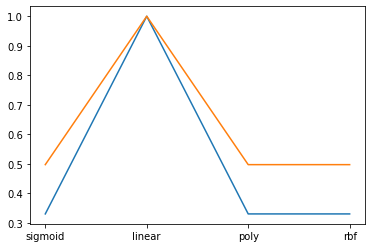

In [48]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score


kernel_list = ['sigmoid', 'linear', 'poly', 'rbf']
score_list = []
f1_list = []
jac_list = []

for kernel in kernel_list:
    my_svm = svm.SVC(kernel=kernel).fit(X_train, y_train) 
    predict_y = my_svm.predict(X_test)
    #score_list.append(metrics.accuracy_score(test_y, predict_y))    
    f1_list.append(f1_score(y_test, predict_y, average='weighted') )  
    jac_list.append(jaccard_similarity_score(y_test, predict_y) )  

 
#plt.plot(max_depth_list, score_list)
plt.plot(kernel_list, f1_list)
plt.plot(kernel_list, jac_list)

## We opted to go with the linear svm

In [13]:
#print(f1_list, jac_list)
#my_poly_svm = svm.SVC(kernel='poly').fit(X_train, y_train) 
predict_y = my_svm.predict(X_test)
# my_sum = 0 
# for i,j in zip(predict_y, y_test):
#     if i == j:
#         my_sum += 1

# print(my_sum, len(predict_y))
# print(predict_y[3], y_test[3])


{'Fall': 14844, 'Spring': 9157, 'Summer': 14672, 'Winter': 17136}
[14844, 9157, 14672, 17136] ['Fall', 'Spring', 'Summer', 'Winter']


<BarContainer object of 4 artists>

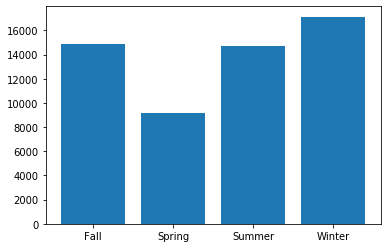

In [28]:
#analyzing data based on time of the year
season = ['Fall', 'Spring', 'Summer', 'Winter']
my_season = {}
for i in season:
    sum_value = 0
    for code, s in zip(all_data['SEVERITYCODE'], all_data[i]):
        if s == 1 and code == 1:
            sum_value += 1
    my_season[i] = sum_value
print(my_season)
print(list(my_season.values()), list(my_season.keys()))
plt.bar(list(my_season.keys()), list(my_season.values()))

{'Early Evening (Rush Hour)': 9903, 'Early Morning': 3546, 'Late Evening': 5856, 'Late Morning': 12469}
[9903, 3546, 5856, 12469] ['Early Evening (Rush Hour)', 'Early Morning', 'Late Evening', 'Late Morning']


<BarContainer object of 4 artists>

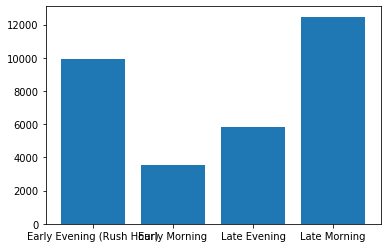

In [47]:
#analyzing data based on time of day
time = ['Early Evening (Rush Hour)', 'Early Morning', 'Late Evening', 'Late Morning']
my_time = {}
for i in time:
    sum_value = 0
    for code, s in zip(all_data['SEVERITYCODE'], all_data[i]):
        if s == 1 and code == 1:
            sum_value += 1
    my_time[i] = sum_value
print(my_time)
print(list(my_time.values()), list(my_time.keys()))
plt.bar(list(my_time.keys()), list(my_time.values()))

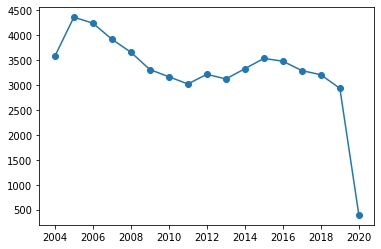

In [46]:
#analyzing data based on time of the year
import seaborn as sb
year = all_data['YEAR'].unique()

my_year = {}

for i in year:
    my_year[i] = 0
    
for i in year:
    sum_value = 0
    for code, s in zip(all_data['SEVERITYCODE'], all_data['YEAR']):
        if code == 1 and str(s) == str(i):
            my_year[i] = my_year[i] + 1
my_year
            
plt.scatter(list(my_year.keys()), list(my_year.values()))     
sb.lineplot(list(my_year.keys()), list(my_year.values()))

__Conclusion__: According to the data, severe accidents (code = 2) s are more likely to occur during the Winter and Fall. Moreover, they occur most frequently in the early evening (rush hour) and late morning (during lunch time). Further, accidents with severity code of 2 have declined since 2004.  